In [1]:
# declare a list tasks whose products you want to use as inputs
upstream = None


In [2]:
# Parameters
product = {"data": "/Users/lukastang/Documents/GitHub/Model_Interpretability/output/0_source_data/obesity_dataset.csv", "nb": "/Users/lukastang/Documents/GitHub/Model_Interpretability/output/0_source_data/0_source_data.ipynb", "on_finish": "/Users/lukastang/Documents/GitHub/Model_Interpretability/0_source_data_test.py"}


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, theme, element_text

In [4]:
# file path to data
filename = "/Users/lukastang/Documents/GitHub/Model_Interpretability/data/Obesity_Dataset.xlsx"

In [5]:
# Read the Excel file
# Define the relative path to the folder and the Excel file
obesity_dataset = pd.read_excel(filename , sheet_name="obesity_dataset")
obesity_dataset_mappings = pd.read_excel(filename, sheet_name="mappings")

In [6]:
# Print the head of the dataset
print(obesity_dataset.head())

   Sex  Age  Height  Overweight_Obese_Family  Consumption_of_Fast_Food  \
0    2   18     155                        2                         2   
1    2   18     158                        2                         2   
2    2   18     159                        2                         2   
3    2   18     162                        2                         2   
4    2   18     165                        2                         1   

   Frequency_of_Consuming_Vegetables  Number_of_Main_Meals_Daily  \
0                                  3                           1   
1                                  3                           1   
2                                  2                           1   
3                                  2                           2   
4                                  2                           1   

   Food_Intake_Between_Meals  Smoking  Liquid_Intake_Daily  \
0                          3        2                    1   
1                     

In [7]:
def map_variable(df, mappings, variable):
    mapping_dict = mappings[mappings['Variable'] == variable].set_index('Value')['Mapping'].to_dict()
    df[variable + '_mapped'] = df[variable].map(mapping_dict)

In [8]:
variables_to_map = [
    'Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food', 
    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily', 
    'Food_Intake_Between_Meals', 'Smoking', 'Liquid_Intake_Daily', 
    'Calculation_of_Calorie_Intake', 'Physical_Excercise', 
    'Schedule_Dedicated_to_Technology', 'Type_of_Transportation_Used', 'Class'
]

In [9]:
for variable in variables_to_map:
    map_variable(obesity_dataset, obesity_dataset_mappings, variable)

In [10]:
# Print the head of the dataset with mapped variables
print(obesity_dataset.head())

   Sex  Age  Height  Overweight_Obese_Family  Consumption_of_Fast_Food  \
0    2   18     155                        2                         2   
1    2   18     158                        2                         2   
2    2   18     159                        2                         2   
3    2   18     162                        2                         2   
4    2   18     165                        2                         1   

   Frequency_of_Consuming_Vegetables  Number_of_Main_Meals_Daily  \
0                                  3                           1   
1                                  3                           1   
2                                  2                           1   
3                                  2                           2   
4                                  2                           1   

   Food_Intake_Between_Meals  Smoking  Liquid_Intake_Daily  ...  \
0                          3        2                    1  ...   
1           

Some Visualizations

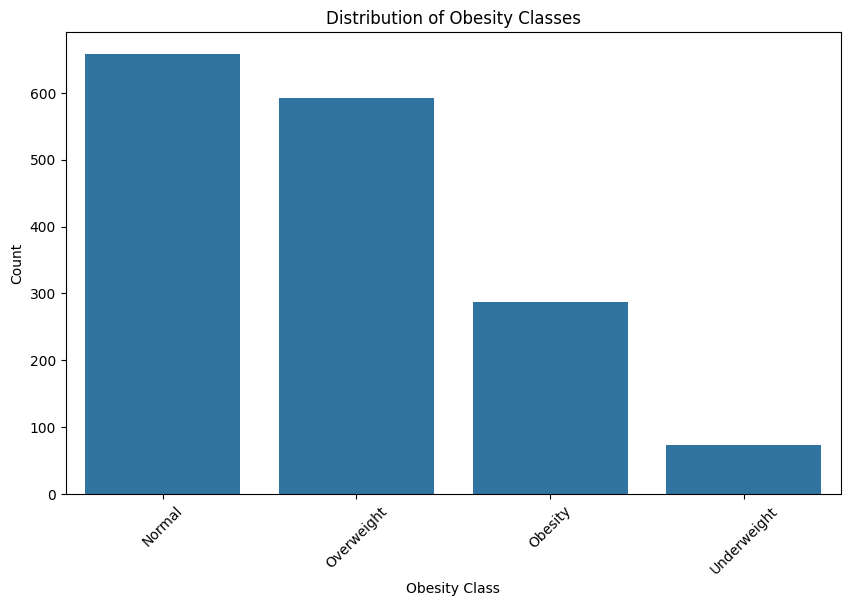

In [11]:
# Plot distribution of the mapped 'Class' variable
plt.figure(figsize=(10, 6))
sns.countplot(data=obesity_dataset, x='Class_mapped')
plt.title('Distribution of Obesity Classes')
plt.xlabel('Obesity Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Plot distribution of the mapped 'Class' variable using plotnine
plot = (
    ggplot(obesity_dataset, aes(x='Class_mapped')) +
    geom_bar() +
    theme_minimal() +
    labs(title='Distribution of Obesity Classes', x='Obesity Class', y='Count') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)

/var/folders/r7/71vqyh_566sb4rd655_gw2300000gn/T/ipykernel_4805/1980431296.py:1: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


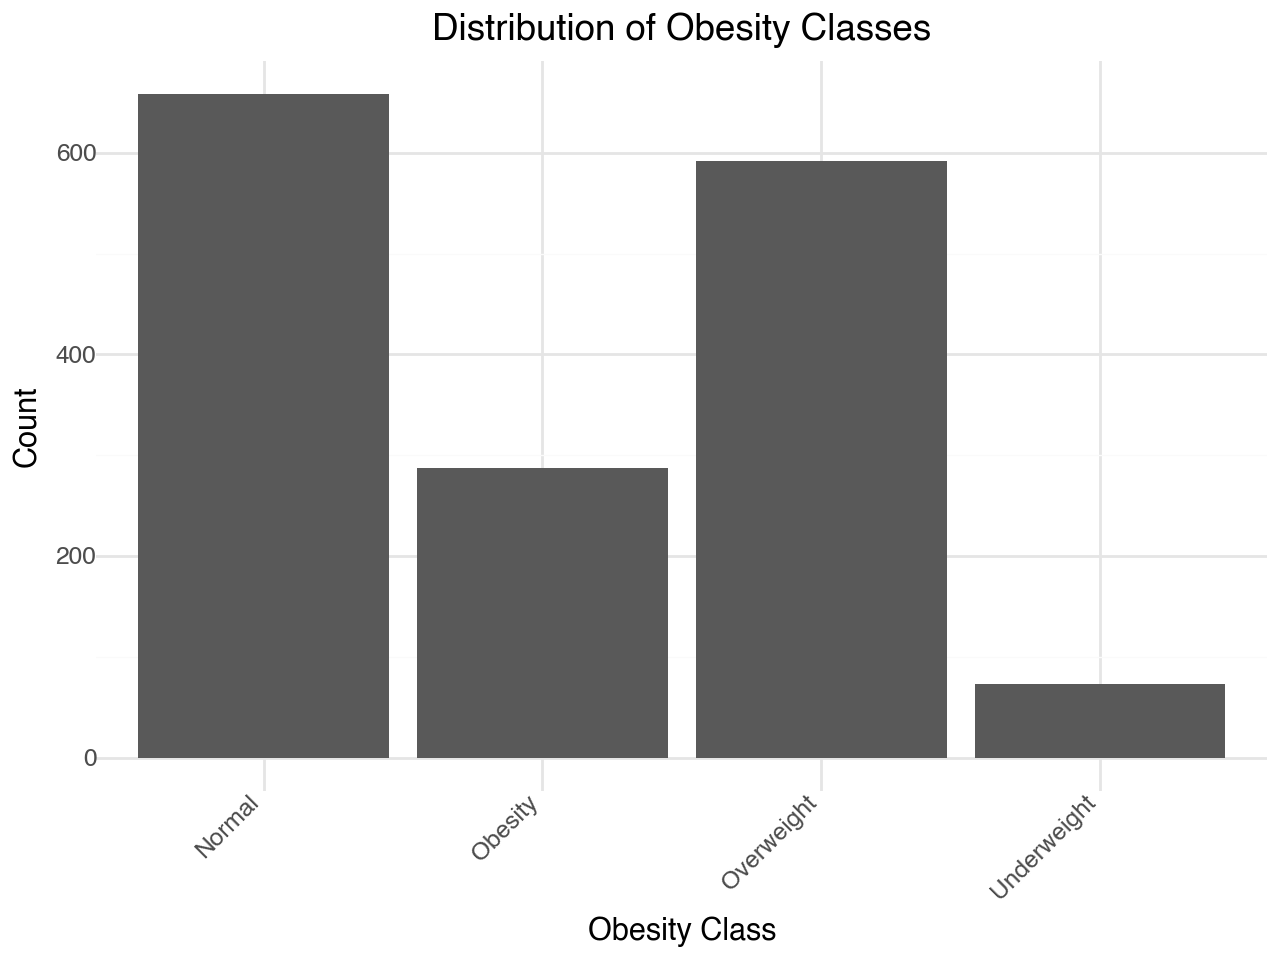

In [13]:
print(plot)

In [14]:
# Save the DataFrame to a CSV file
obesity_dataset.to_csv("output/0_source_data/obesity_dataset.csv", index=False)

In [15]:
print("Obesity data generated and saved to 'obesity_dataset.csv'")

Obesity data generated and saved to 'obesity_dataset.csv'
